In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import numpy as np
import pandas as pd
import seaborn as sns
import re
sns.set()
from datetime import datetime 
from dateutil import parser
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
import seaborn; 
seaborn.set()


### 시작하면 describe , head() , isnull().sum().sum() , .dtypes

In [2]:
mlb=pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/dataScience제출물/MLB_Height_Weight (1).csv')

In [3]:
mlb.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71


In [4]:
mlbt=pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/dataScience제출물/MLB_team_name.csv')

In [6]:
mlbt.head()

,Team_Name,Abbv
0,Arizona Diamondbacks,ari
1,Atlanta Braves,atl
2,Baltimore Orioles,bal
3,Boston Red Sox,bos
4,Chicago White Sox,cws


#  두 데이터 합치기
# 속성 소문자로 전환
# 합치면서 동일한 열 삭제

In [12]:
mlb['Team']=mlb['Team'].str.lower()

In [13]:
mlb.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,bal,Catcher,74,180.0,22.99
1,Paul_Bako,bal,Catcher,74,215.0,34.69
2,Ramon_Hernandez,bal,Catcher,72,210.0,30.78
3,Kevin_Millar,bal,First_Baseman,72,210.0,35.43
4,Chris_Gomez,bal,First_Baseman,73,188.0,35.71


In [15]:
MLB=pd.merge(mlb,mlbt,left_on="Team",right_on="Abbv").drop('Abbv', axis=1)

In [62]:
MLB

,Name,Team,Position,Height(inches),Weight(pounds),Age,Team_Name,first_name,last_name
0,Adam_Donachie,bal,Catcher,74,180.0,22.99,Baltimore Orioles,Adam,Donachie
1,Paul_Bako,bal,Catcher,74,215.0,34.69,Baltimore Orioles,Paul,Bako
2,Ramon_Hernandez,bal,Catcher,72,210.0,30.78,Baltimore Orioles,Ramon,Hernandez
3,Kevin_Millar,bal,First_Baseman,72,210.0,35.43,Baltimore Orioles,Kevin,Millar
4,Chris_Gomez,bal,First_Baseman,73,188.0,35.71,Baltimore Orioles,Chris,Gomez
...,...,...,...,...,...,...,...,...,...
934,Brad_Thompson,stl,Relief_Pitcher,73,190.0,25.08,St. Louis Cardinals,Brad,Thompson
935,Tyler_Johnson,stl,Relief_Pitcher,74,180.0,25.73,St. Louis Cardinals,Tyler,Johnson
936,Chris_Narveson,stl,Relief_Pitcher,75,205.0,25.19,St. Louis Cardinals,Chris,Narveson
937,Randy_Keisler,stl,Relief_Pitcher,75,190.0,31.01,St. Louis Cardinals,Randy,Keisler


In [18]:
MLB.describe()

,Height(inches),Weight(pounds),Age
count,939.000000,938.000000,939.000000
mean,73.693291,201.341151,28.851800
std,2.318846,20.941114,4.341876
min,67.000000,150.000000,20.900000
25%,72.000000,186.000000,25.515000
50%,74.000000,200.000000,28.060000
75%,75.000000,215.000000,31.355000
max,83.000000,290.000000,48.520000


## describe 분석 예시 
### 수치형
- Description of numerical data.
- The data consist of 200 rows and 4 columns.

- the spending of tv advertising is about 147.042 (at the average)

- the spending of radio advertising is about 23.264 (at the average)

- the spending of news advertising is about 30.554 (at the average)

### Description of numerical data.
### Statistical figures for Height(inches): 'count' is 939, 'mean' is 73.69 and 'std' is 2.3.

In [19]:
MLB.describe(include=[np.object])

,Name,Team,Position,Team_Name
count,939,939,939,939
unique,939,27,9,27
top,Vinnie_Chulk,nym,Relief_Pitcher,New York Mets
freq,1,38,288,38


### 범주형
- Description of categorical data.
- Categorical data is consist of (  ) 
- the unique of 'Name' is 939



In [30]:
m=MLB.groupby(['Team'])['Height(inches)'].aggregate(['mean'])

In [31]:
m.head()

,mean
Team,
ana,73.342857
atl,73.837838
bal,73.485714
bos,74.222222
chc,74.138889


### ascending 내림차순 오름차순

In [32]:
m= m.sort_values(by=['mean'], ascending=False)

In [33]:
m

,mean
Team,
cws,74.636364
nyy,74.343750
bos,74.222222
was,74.138889
chc,74.138889
cle,74.085714
tex,74.085714
col,73.942857
tor,73.882353


In [34]:
m.iloc[0]

mean    74.636364
Name: cws, dtype: float64

## plt.ylim(70,75) plot y축 범위 
## 수치형1개 범주형1개
- 이쁜거
- fig, ax = plt.subplots(figsize = (40,10))
- plt.xticks(rotation = 45 )
- sns.barplot(data=c , x='Team' , y='Height(inches)')
- plt.ylim(70,75)
- plt.xlim()
- plt.show()

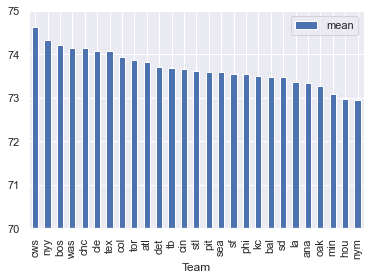

In [36]:
m.plot.bar()
plt.ylim(70,75)
plt.show()

In [43]:
MLB.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age,Team_Name
0,Adam_Donachie,bal,Catcher,74,180.0,22.99,Baltimore Orioles
1,Paul_Bako,bal,Catcher,74,215.0,34.69,Baltimore Orioles
2,Ramon_Hernandez,bal,Catcher,72,210.0,30.78,Baltimore Orioles
3,Kevin_Millar,bal,First_Baseman,72,210.0,35.43,Baltimore Orioles
4,Chris_Gomez,bal,First_Baseman,73,188.0,35.71,Baltimore Orioles


## 데이터프레임에서 구분자 사용 split 

In [52]:
MLB['first_name']=MLB['Name'].str.split("_").str[0]

In [53]:
MLB['last_name']=MLB['Name'].str.split("_").str[1]

In [54]:
MLB.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age,Team_Name,first_name,last_name
0,Adam_Donachie,bal,Catcher,74,180.0,22.99,Baltimore Orioles,Adam,Donachie
1,Paul_Bako,bal,Catcher,74,215.0,34.69,Baltimore Orioles,Paul,Bako
2,Ramon_Hernandez,bal,Catcher,72,210.0,30.78,Baltimore Orioles,Ramon,Hernandez
3,Kevin_Millar,bal,First_Baseman,72,210.0,35.43,Baltimore Orioles,Kevin,Millar
4,Chris_Gomez,bal,First_Baseman,73,188.0,35.71,Baltimore Orioles,Chris,Gomez


## 동일한 값들 뽑기

In [55]:
MLB['last_name'].value_counts()

Perez        7
Johnson      7
Jones        6
Wilson       6
Rodriguez    6
            ..
Gomez        1
Jimerson     1
Wuertz       1
Abreu        1
Sampson      1
Name: last_name, Length: 784, dtype: int64

In [273]:
act=pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/dataScience제출물/activity.csv')

In [59]:
act.head()

,steps,date,interval
0,NaN,2012-10-01,0
1,NaN,2012-10-01,5
2,NaN,2012-10-01,10
3,NaN,2012-10-01,15
4,NaN,2012-10-01,20


In [60]:
act.dropna()

,steps,date,interval
288,0.0,2012-10-02,0
289,0.0,2012-10-02,5
290,0.0,2012-10-02,10
291,0.0,2012-10-02,15
292,0.0,2012-10-02,20
...,...,...,...
17275,0.0,2012-11-29,2335
17276,0.0,2012-11-29,2340
17277,0.0,2012-11-29,2345
17278,0.0,2012-11-29,2350


## 수치형2개(mean,sum)를수치형1개(interval)로plot 비교 
## 수치형3개
## meanplot
## sumplot

In [71]:
act1=act.groupby(['interval'])['steps'].aggregate(['mean','sum'])
act1.head()

,mean,sum
interval,,
0,1.716981,91.0
5,0.339623,18.0
10,0.132075,7.0
15,0.150943,8.0
20,0.075472,4.0


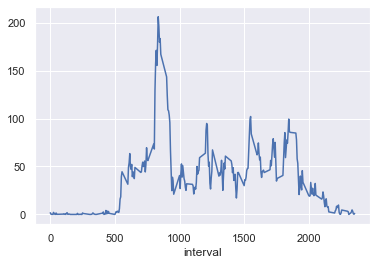

In [74]:
act1['mean'].plot()

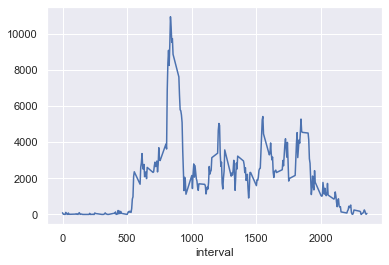

In [75]:
act1['sum'].plot()

In [79]:
A=act.dropna()
A.head()

,steps,date,interval
288,0.0,2012-10-02,0
289,0.0,2012-10-02,5
290,0.0,2012-10-02,10
291,0.0,2012-10-02,15
292,0.0,2012-10-02,20


In [82]:
adate=A.groupby(['date'])['steps'].aggregate(['mean','sum'])

In [84]:
adate.head()

,mean,sum
date,,
2012-10-02,0.437500,126.0
2012-10-03,39.416667,11352.0
2012-10-04,42.069444,12116.0
2012-10-05,46.159722,13294.0
2012-10-06,53.541667,15420.0


## datetime(날짜)으로 데이터타입변환 - 날짜가 인덱스

In [97]:
adate.index=pd.to_datetime(adate.index)



In [98]:
adate

,mean,sum
date,,
2012-10-02,0.437500,126.0
2012-10-03,39.416667,11352.0
2012-10-04,42.069444,12116.0
2012-10-05,46.159722,13294.0
2012-10-06,53.541667,15420.0
2012-10-07,38.246528,11015.0
2012-10-09,44.482639,12811.0
2012-10-10,34.375000,9900.0
2012-10-11,35.777778,10304.0


## 날짜데이터시각화
## resample
## 날짜시각화 , 날짜 , 수치형2개

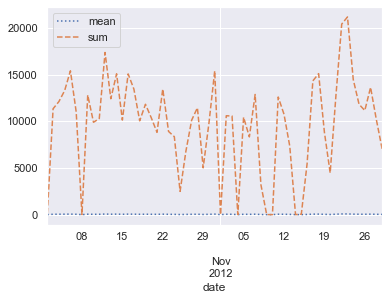

In [101]:
weekly = adate.resample('D').sum() #1 year consists of 52 weeks
weekly.plot(style=[':', '--']) #separate the plot from the three columns
plt.ylabel('');

In [610]:
act=pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/dataScience제출물/activity.csv')

In [278]:
act=act.dropna()

In [279]:
act.head()

,steps,date,interval
288,0.0,2012-10-02,0
289,0.0,2012-10-02,5
290,0.0,2012-10-02,10
291,0.0,2012-10-02,15
292,0.0,2012-10-02,20


## 데이터타입변환 - 날짜

In [280]:
act['date']= pd.to_datetime(act['date'])

## 데이터타입 - 날짜를 인덱스로 

In [281]:
act.set_index("date", inplace = True)

## 날짜를 monday

In [282]:
actt=act.groupby(act.index.dayofweek).sum()
actt


,steps,interval
date,,
0,69824.0,2373840
1,80546.0,3052080
2,94326.0,2712960
3,65702.0,2712960
4,86518.0,2373840
5,87748.0,2373840
6,85944.0,2373840


In [292]:
weekend = np.where(actt.index < 5, 'Weekday', 'Weekend')
by_time = actt.groupby([weekend]).sum()
by_time

,steps
Weekday,396916.0
Weekend,173692.0


In [302]:
data=by_time.reset_index()
data

,index,steps
0,Weekday,396916.0
1,Weekend,173692.0


## dataframe시각화
## 수치형1개시각화
## 범주형1개시각화
## 

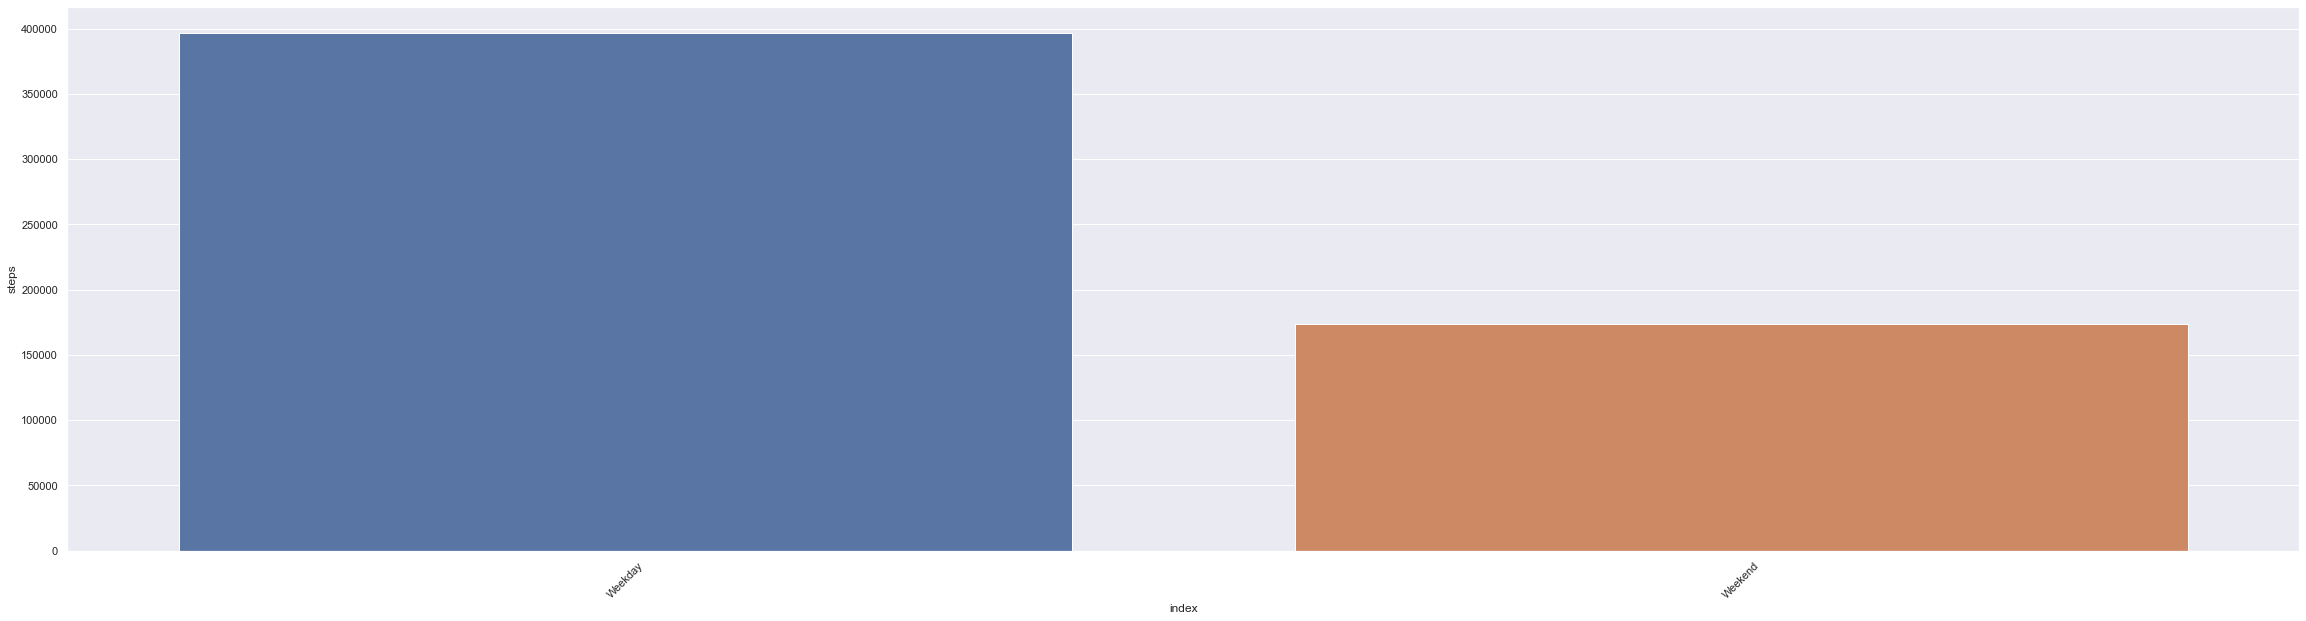

In [308]:
fig, ax = plt.subplots(figsize = (40,10))
plt.xticks(rotation = 45 )
sns.barplot(data=data , x='index' , y='steps')
plt.xlim()
plt.show()

In [631]:
act=pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/dataScience제출물/activity.csv')

In [632]:
act

,steps,date,interval
0,NaN,2012-10-01,0
1,NaN,2012-10-01,5
2,NaN,2012-10-01,10
3,NaN,2012-10-01,15
4,NaN,2012-10-01,20
...,...,...,...
17563,NaN,2012-11-30,2335
17564,NaN,2012-11-30,2340
17565,NaN,2012-11-30,2345
17566,NaN,2012-11-30,2350


In [633]:
ba=act.fillna(method='bfill')
ba

,steps,date,interval
0,0.0,2012-10-01,0
1,0.0,2012-10-01,5
2,0.0,2012-10-01,10
3,0.0,2012-10-01,15
4,0.0,2012-10-01,20
...,...,...,...
17563,NaN,2012-11-30,2335
17564,NaN,2012-11-30,2340
17565,NaN,2012-11-30,2345
17566,NaN,2012-11-30,2350


In [634]:
ba.set_index("date", inplace = True)


In [635]:
ba.head()

,steps,interval
date,,
2012-10-01,0.0,0
2012-10-01,0.0,5
2012-10-01,0.0,10
2012-10-01,0.0,15
2012-10-01,0.0,20


In [639]:
ba=ba.drop("interval",axis=1)


In [612]:
fa=act.fillna(method='ffill')
fa

,steps,date,interval
0,NaN,2012-10-01,0
1,NaN,2012-10-01,5
2,NaN,2012-10-01,10
3,NaN,2012-10-01,15
4,NaN,2012-10-01,20
...,...,...,...
17563,0.0,2012-11-30,2335
17564,0.0,2012-11-30,2340
17565,0.0,2012-11-30,2345
17566,0.0,2012-11-30,2350


In [640]:
fa.set_index("date", inplace = True)


In [641]:
fa=fa.drop("interval",axis=1)


In [647]:
fa

,steps
date,
2012-10-01,NaN
2012-10-01,NaN
2012-10-01,NaN
2012-10-01,NaN
2012-10-01,NaN
...,...
2012-11-30,0.0
2012-11-30,0.0
2012-11-30,0.0


In [648]:
ba.index= pd.to_datetime(ba.index)

In [649]:
fa.index=pd.to_datetime(fa.index)

In [652]:
BF=pd.merge(fa,ba,on="date")

In [660]:
BF.tail()

,steps_x,steps_y
date,,
2012-11-30,0.0,NaN
2012-11-30,0.0,NaN
2012-11-30,0.0,NaN
2012-11-30,0.0,NaN
2012-11-30,0.0,NaN


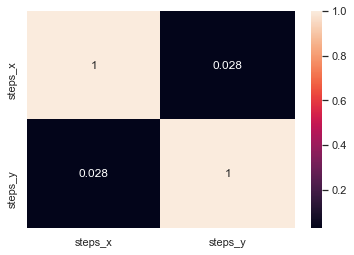

In [665]:
sns.heatmap(BF.corr(), annot=True)

# ffill , bfill 차이
### ffill은 Null값 바로 앞에 있는 값으로 Null값을 채운다. 하지만, 이 dataset은 0번째 index부터 Null 값이므로 값이 등장하기 전까지는 Null 값들을 채울 수 없다 , bfill은 Null값 바로 뒤에 있는 값으로 Null값을 채운다. 하지만, 이 dateset은 마지막번째 index가 Null값이므로 값이 등장하기 전까지는 Null 값들을 채울 수 없다.

### 'ffill' fills the null value with the value just before the null value. However, since this dataset is a null value from the 0th index, the null values cannot be filled until the value appears, 'bfill' fills the null value with the value immediately after the null value. However, the dataet cannot fill the null values until the value appears because the last index is null.

In [318]:
ba['date']= pd.to_datetime(ba['date'])

In [319]:
ba.set_index("date", inplace = True)

In [356]:
ba

,steps,interval
date,,
2012-10-01,0.0,0
2012-10-01,0.0,5
2012-10-01,0.0,10
2012-10-01,0.0,15
2012-10-01,0.0,20
...,...,...
2012-11-30,NaN,2335
2012-11-30,NaN,2340
2012-11-30,NaN,2345


## 날짜인덱스를 요일로
## 요일로
## 인덱스요일

In [361]:
ba.index=ba.index.strftime('%A')

In [362]:
ba

,steps,interval
date,,
Monday,0.0,0
Monday,0.0,5
Monday,0.0,10
Monday,0.0,15
Monday,0.0,20
...,...,...
Friday,NaN,2335
Friday,NaN,2340
Friday,NaN,2345


In [372]:
ba=ba.groupby('date')[['steps']].sum()
ba

,steps
date,
Friday,86518.0
Monday,69824.0
Saturday,87748.0
Sunday,85944.0
Thursday,65702.0
Tuesday,80546.0
Wednesday,94326.0


## 열과행바꾸기

In [374]:
ba.transpose()

date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
steps,86518.0,69824.0,87748.0,85944.0,65702.0,80546.0,94326.0


In [366]:
b.drop("interval",axis=1)

,index,date,steps
Mon,0,0,69824.0
Tues,1,1,80546.0
Wed,2,2,94326.0
Thurs,3,3,65702.0
Fri,4,4,86518.0
Sat,5,5,87748.0
Sun,6,6,85944.0


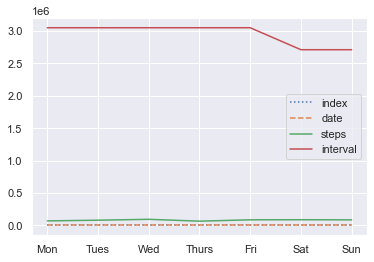

In [365]:
b.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
b.plot(style=[':', '--',]);

In [375]:
dia=pd.read_csv('C:/Users/82106/Desktop/2020-2학기/데싸/chap.3/diamonds.csv')

In [376]:
dia

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## 범주형한개 
## value_counts() 사용해서하기

In [380]:
col=dia['color'].value_counts()

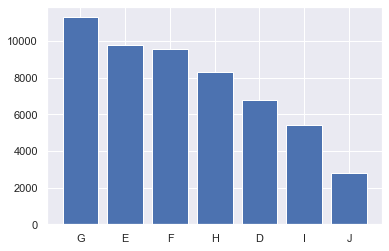

In [383]:
plt.bar(col.index,col)
plt.show()

In [384]:
cla=dia['clarity'].value_counts()

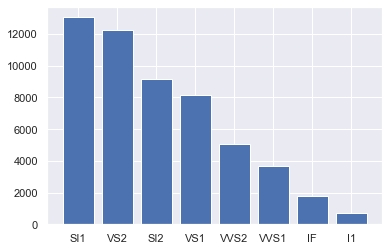

In [385]:
plt.bar(cla.index,cla)
plt.show()

## 수치형한개
## hist

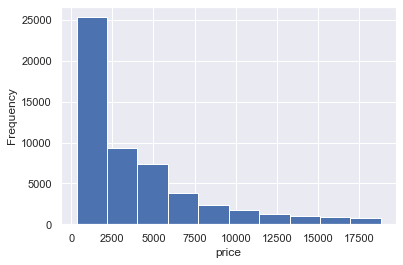

In [389]:
plt.hist(dia['price'], bins = 10) #histogram with bins (class interval) = 10 (equals part)
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

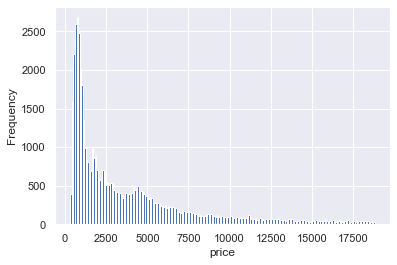

In [387]:
plt.hist(dia['price'], bins = 200) #histogram with bins (class interval) = 10 (equals part)
plt.xlabel("price")
plt.ylabel("Frequency")
plt.show()

## 수치형두개
## regplot 사용 회귀선 빨간색

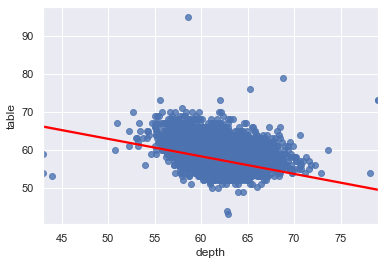

In [406]:
sns.regplot(x = dia[ "depth" ], y = dia[ "table" ],line_kws={'color':"red"}) 

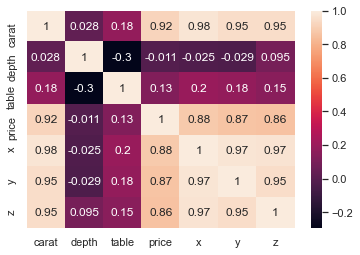

In [395]:
sns.heatmap(dia.corr(), annot=True)

## 두개범주형 한개수치형 
## linspace하기

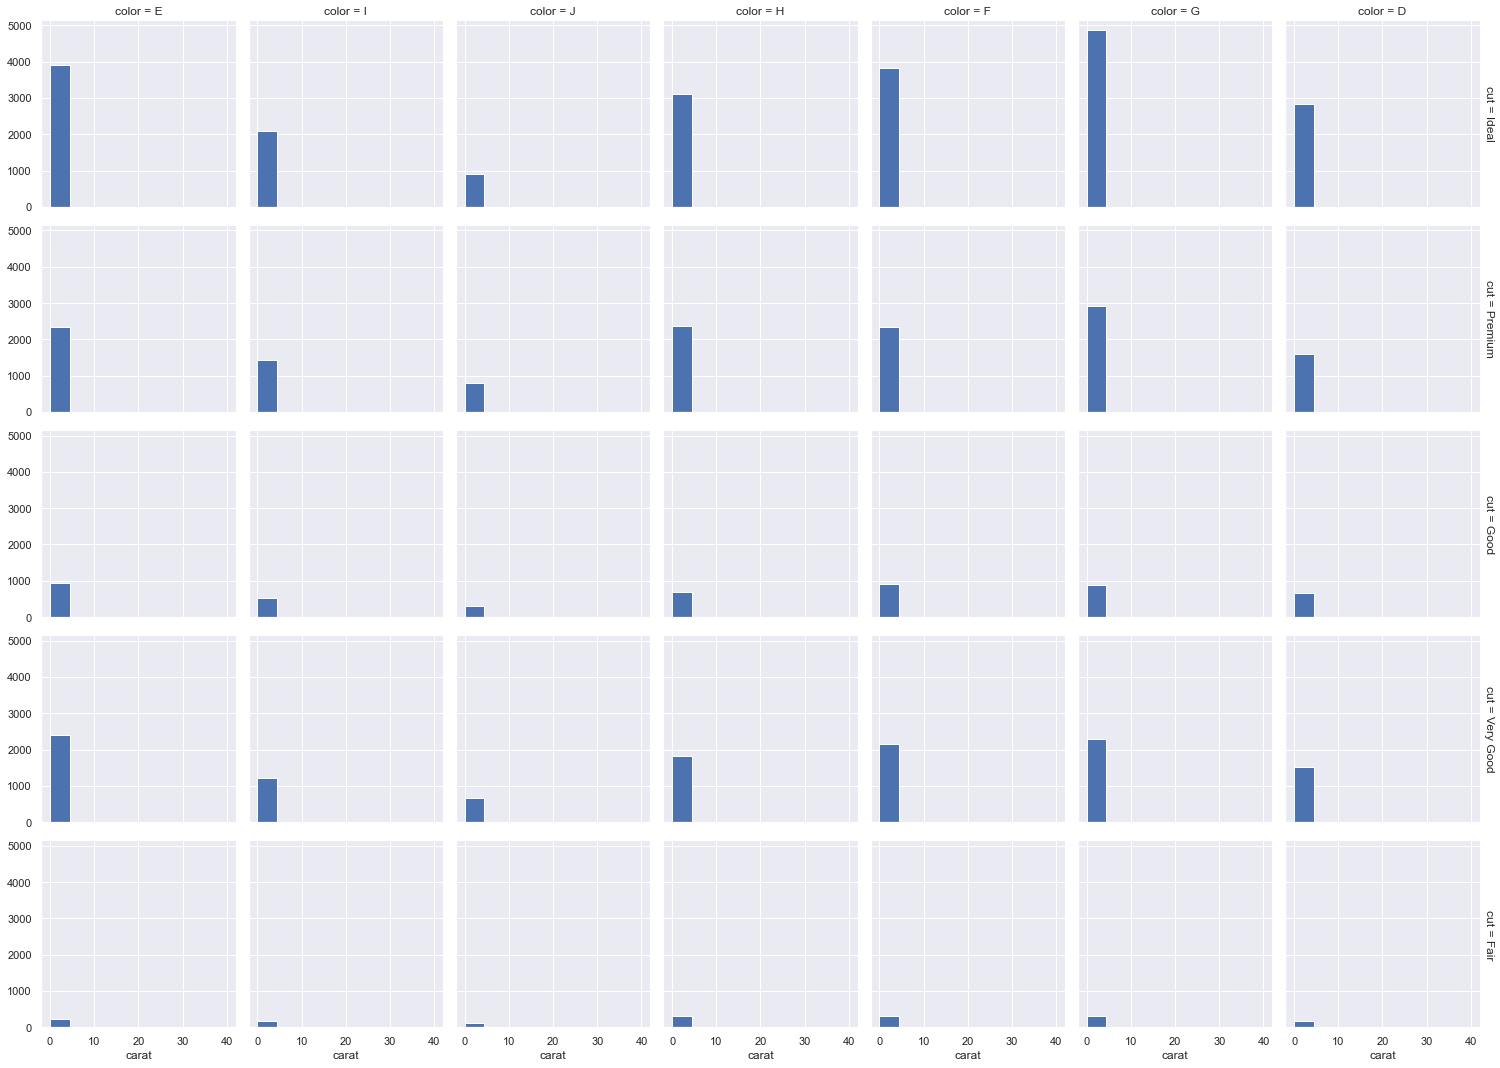

In [393]:
grid = sns.FacetGrid(dia, row="cut", col="color", margin_titles=True)
grid.map(plt.hist, "carat", bins=np.linspace(0, 40, 10)); 

## 두개범주형 한개수치형

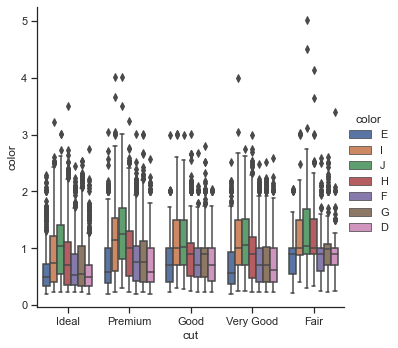

In [394]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("cut", "carat", "color", data=dia, kind="box")
    g.set_axis_labels("cut", "color");

In [396]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


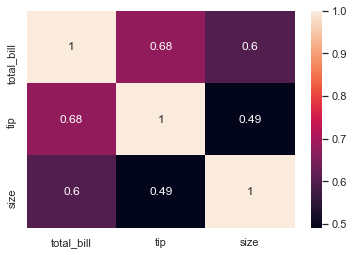

In [397]:
sns.heatmap(tips.corr(), annot=True)

## hue로 기준만 잡으면 수치형과 범주형 상관없음.

C:\Users\82106\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\82106\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\82106\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


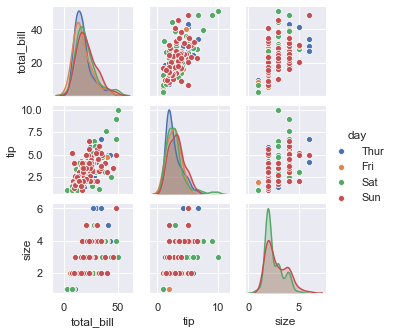

In [398]:
sns.pairplot(tips, hue='day', size=1.5);

새로운 컬럼 추가

In [399]:
tips['tip_percent'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


## 범주형두개, 수치형한개

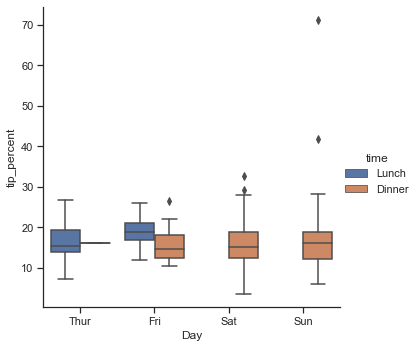

In [405]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("day", "tip_percent", "time", data=tips, kind="box")
    g.set_axis_labels("Day", "tip_percent");

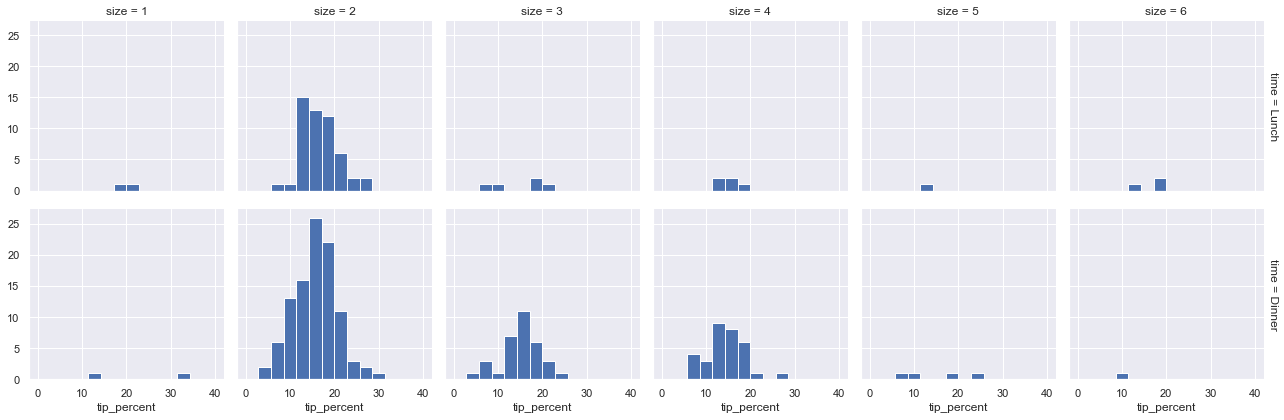

In [402]:
grid = sns.FacetGrid(tips, row="time", col="size", margin_titles=True)
grid.map(plt.hist, "tip_percent", bins=np.linspace(0, 40, 15)); 

In [474]:
ins=pd.read_csv('C:/Users/82106/Desktop/insurance-a.csv')

BMI에 몇 가지 결측값이 있다. 그 값을 평균 또는 평균으로 바꿀 수 있는가?
중위수? 교체를 위한 평균 또는 중위수 값을 얻는 방법을 결정할 수 있다. 예를 들어,
성별에 따른 BMI의 평균 또는 중위수 교체에 대한 이유를 설명하십시오!

In [441]:
ins.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [442]:
ins["bmi"].fillna(ins.groupby("sex")["bmi"].transform("mean"), inplace=True)

In [443]:
ins

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


탐색 데이터 분석(EDA)! EDA에서는 요약을 표시해야 함
(설명 사용) 및 간략한 시각화.

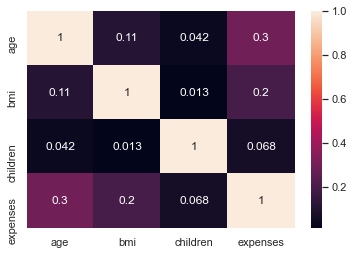

In [444]:
sns.heatmap(ins.corr(),annot=True)

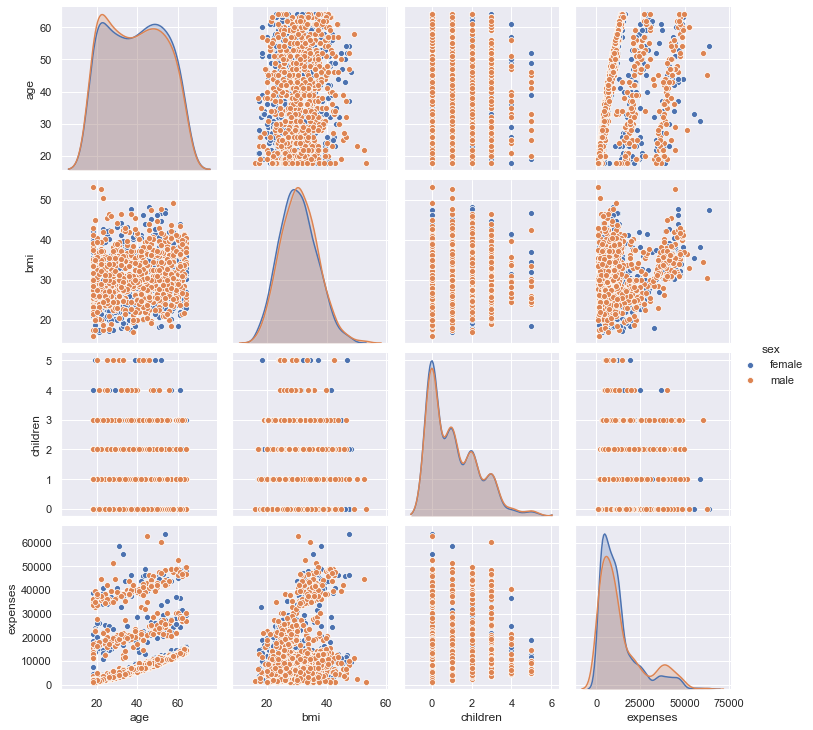

In [445]:
sns.pairplot(ins, hue='sex', height=2.5); 

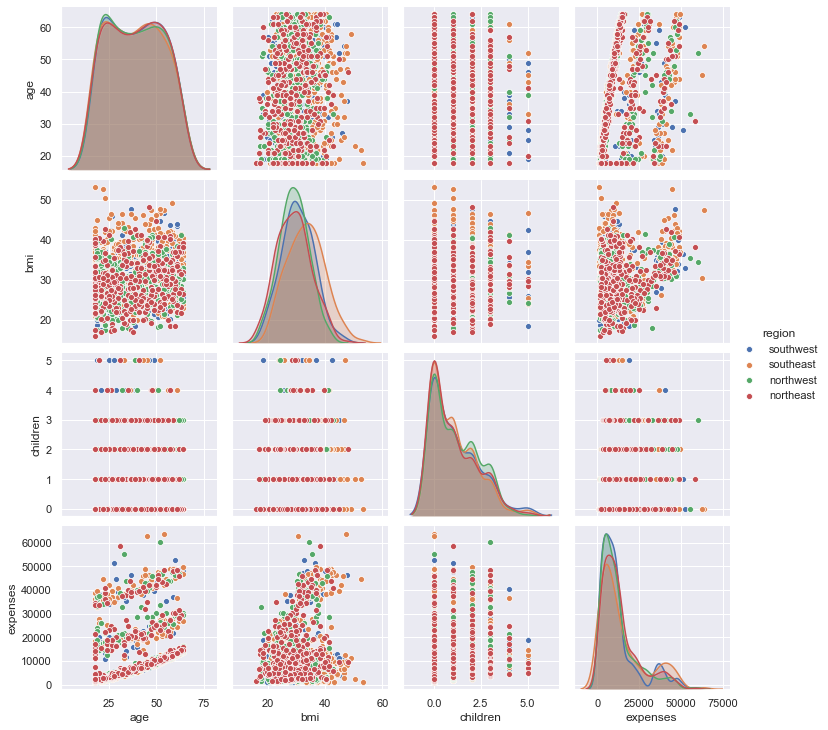

In [446]:
sns.pairplot(ins, hue='region', height=2.5); 

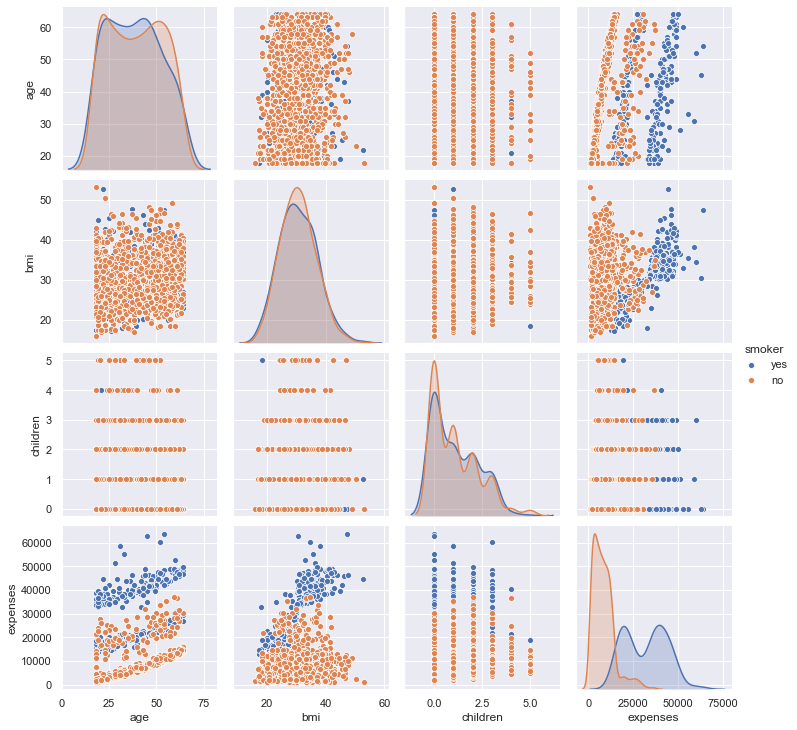

In [447]:
sns.pairplot(ins, hue='smoker', height=2.5); 

성별과 지역을 기준으로 지출의 평균과 중위수를 찾으십시오! 거기는 크니?
성별에 따른 지역 간 비용 차이?

In [457]:
ma=ins.groupby(['sex','region'])['expenses'].aggregate(['mean','median'])

In [458]:
ma

mean     median
sex    region                            
female northeast  12953.203106  10197.770
       northwest  12479.870244   9614.070
       southeast  13499.669257   8582.300
       southwest  11274.411667   8530.835
male   northeast  13854.005767   9957.720
       northwest  12354.119317   8413.460
       southeast  15879.617354   9504.310
       southwest  13412.884233   9391.350

In [459]:
ma.index[np.argmax(ma['mean'])]

('male', 'southeast')

In [460]:
ma.index[np.argmax(ma['median'])]

('female', 'northeast')

응답자(성별 기준)가 있는 경우 비용의 평균과 중위수를 구한다.최소 1명의 아이(자녀 > 0)를 갖는 것. 설명하라!

In [481]:
ins

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


## 특정열조건식
## 조건식
## >0
## <0

In [482]:
ins1=ins.loc[ins['children']>0]

In [483]:
ins1.groupby("sex")["expenses"].aggregate(['mean','median'])

,mean,median
sex,,
female,13083.940536,9411.01
male,14776.074885,9058.73


흡연자, 성별, 흡연자에 대한 비용 및 BMI의 평균과 중간값 찾기
아동의 존재 (자녀 >0)

In [485]:
ins1

,age,sex,bmi,children,smoker,region,expenses
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
...,...,...,...,...,...,...,...
1328,23,female,24.2,2,no,northeast,22395.74
1329,52,male,38.6,2,no,southwest,10325.21
1330,57,female,25.7,2,no,southeast,12629.17
1332,52,female,44.7,3,no,southwest,11411.69


In [487]:
ins.groupby(['sex', 'smoker'])['bmi'].aggregate(['mean','median'])

mean  median
sex    smoker                   
female no      30.542308   30.20
       yes     29.594737   28.35
male   no      30.785243   30.50
       yes     31.507547   31.10

나이가 3세(젊은이, 성인, 노인)로 분류된다면, 그 연령에 대해 설명해 주시겠습니까?
각 범주(성별 포함)의 BMI? (연령을 결정할 수 있다.
분류)

In [502]:
ins['AGE'] = pd.cut(ins['age'], [0, 20, 50, 70])
ins

,age,sex,bmi,children,smoker,region,expenses,AGE
0,19,female,27.9,0,yes,southwest,16884.92,"(0, 20]"
1,18,male,33.8,1,no,southeast,1725.55,"(0, 20]"
2,28,male,33.0,3,no,southeast,4449.46,"(20, 50]"
3,33,male,22.7,0,no,northwest,21984.47,"(20, 50]"
4,32,male,28.9,0,no,northwest,3866.86,"(20, 50]"
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,"(20, 50]"
1334,18,female,31.9,0,no,northeast,2205.98,"(0, 20]"
1335,18,female,36.9,0,no,southeast,1629.83,"(0, 20]"
1336,21,female,25.8,0,no,southwest,2007.95,"(20, 50]"


시리즈를 데이터프레임

In [493]:
age=pd.DataFrame(age)

In [494]:
age

,age
0,"(0, 20]"
1,"(0, 20]"
2,"(20, 50]"
3,"(20, 50]"
4,"(20, 50]"
...,...
1333,"(20, 50]"
1334,"(0, 20]"
1335,"(0, 20]"
1336,"(20, 50]"


In [504]:
ia=pd.concat([ins,AGE], axis=1)

In [498]:
ia.

,age,sex,bmi,children,smoker,region,expenses,age
0,19,female,27.9,0,yes,southwest,16884.92,"(0, 20]"
1,18,male,33.8,1,no,southeast,1725.55,"(0, 20]"
2,28,male,33.0,3,no,southeast,4449.46,"(20, 50]"
3,33,male,22.7,0,no,northwest,21984.47,"(20, 50]"
4,32,male,28.9,0,no,northwest,3866.86,"(20, 50]"
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,"(20, 50]"
1334,18,female,31.9,0,no,northeast,2205.98,"(0, 20]"
1335,18,female,36.9,0,no,southeast,1629.83,"(0, 20]"
1336,21,female,25.8,0,no,southwest,2007.95,"(20, 50]"


In [506]:
ins.groupby('AGE')[['bmi']].aggregate('mean')

,bmi
AGE,
"(0, 20]",30.089759
"(20, 50]",30.334483
"(50, 70]",31.706461


In [509]:
ins

,age,sex,bmi,children,smoker,region,expenses,AGE
0,19,female,27.9,0,yes,southwest,16884.92,"(0, 20]"
1,18,male,33.8,1,no,southeast,1725.55,"(0, 20]"
2,28,male,33.0,3,no,southeast,4449.46,"(20, 50]"
3,33,male,22.7,0,no,northwest,21984.47,"(20, 50]"
4,32,male,28.9,0,no,northwest,3866.86,"(20, 50]"
...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,"(20, 50]"
1334,18,female,31.9,0,no,northeast,2205.98,"(0, 20]"
1335,18,female,36.9,0,no,southeast,1629.83,"(0, 20]"
1336,21,female,25.8,0,no,southwest,2007.95,"(20, 50]"


나이(질문 6의 범주에 근거한 것), 성별과 흡연자 정보를 결합해 주시겠습니까?
그룹 조작 작업의 BMI와 비용에 대해 평균과 평균의 관점에서 설명하십시오.
중앙값?

In [511]:
ins.groupby(['AGE','smoker','sex'])['bmi'].aggregate(['mean','median'])

mean  median
AGE      smoker sex                      
(0, 20]  no     female  31.249206   31.40
                male    28.954687   28.60
         yes    female  28.758824   28.30
                male    31.100000   31.20
(20, 50] no     female  30.040426   29.60
                male    30.572204   30.20
         yes    female  29.214286   28.05
                male    31.342000   30.85
(50, 70] no     female  31.325325   31.75
                male    32.117391   32.15
         yes    female  31.107407   31.20
                male    32.197297   32.00

## sep
## 구분자


In [533]:
white=pd.read_csv('C:/Users/82106/Desktop/winequality-white.csv', sep=';')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [534]:
red=pd.read_csv('C:/Users/82106/Desktop/winequality-red.csv', sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


두 csv 파일을 병합하십시오! 탐색 데이터 분석을 수행하십시오. (모두 및 기타 설명 사용)
함수(예: 페어 플롯, 열 지도 등) 병합된 데이터 집합에 대해 간략하게 설명하십시오.

컬럼추가
열추가


In [538]:
red['type']=('red')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [539]:
white['type']=('white')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [540]:
rw=pd.concat([red,white])

In [542]:
rw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


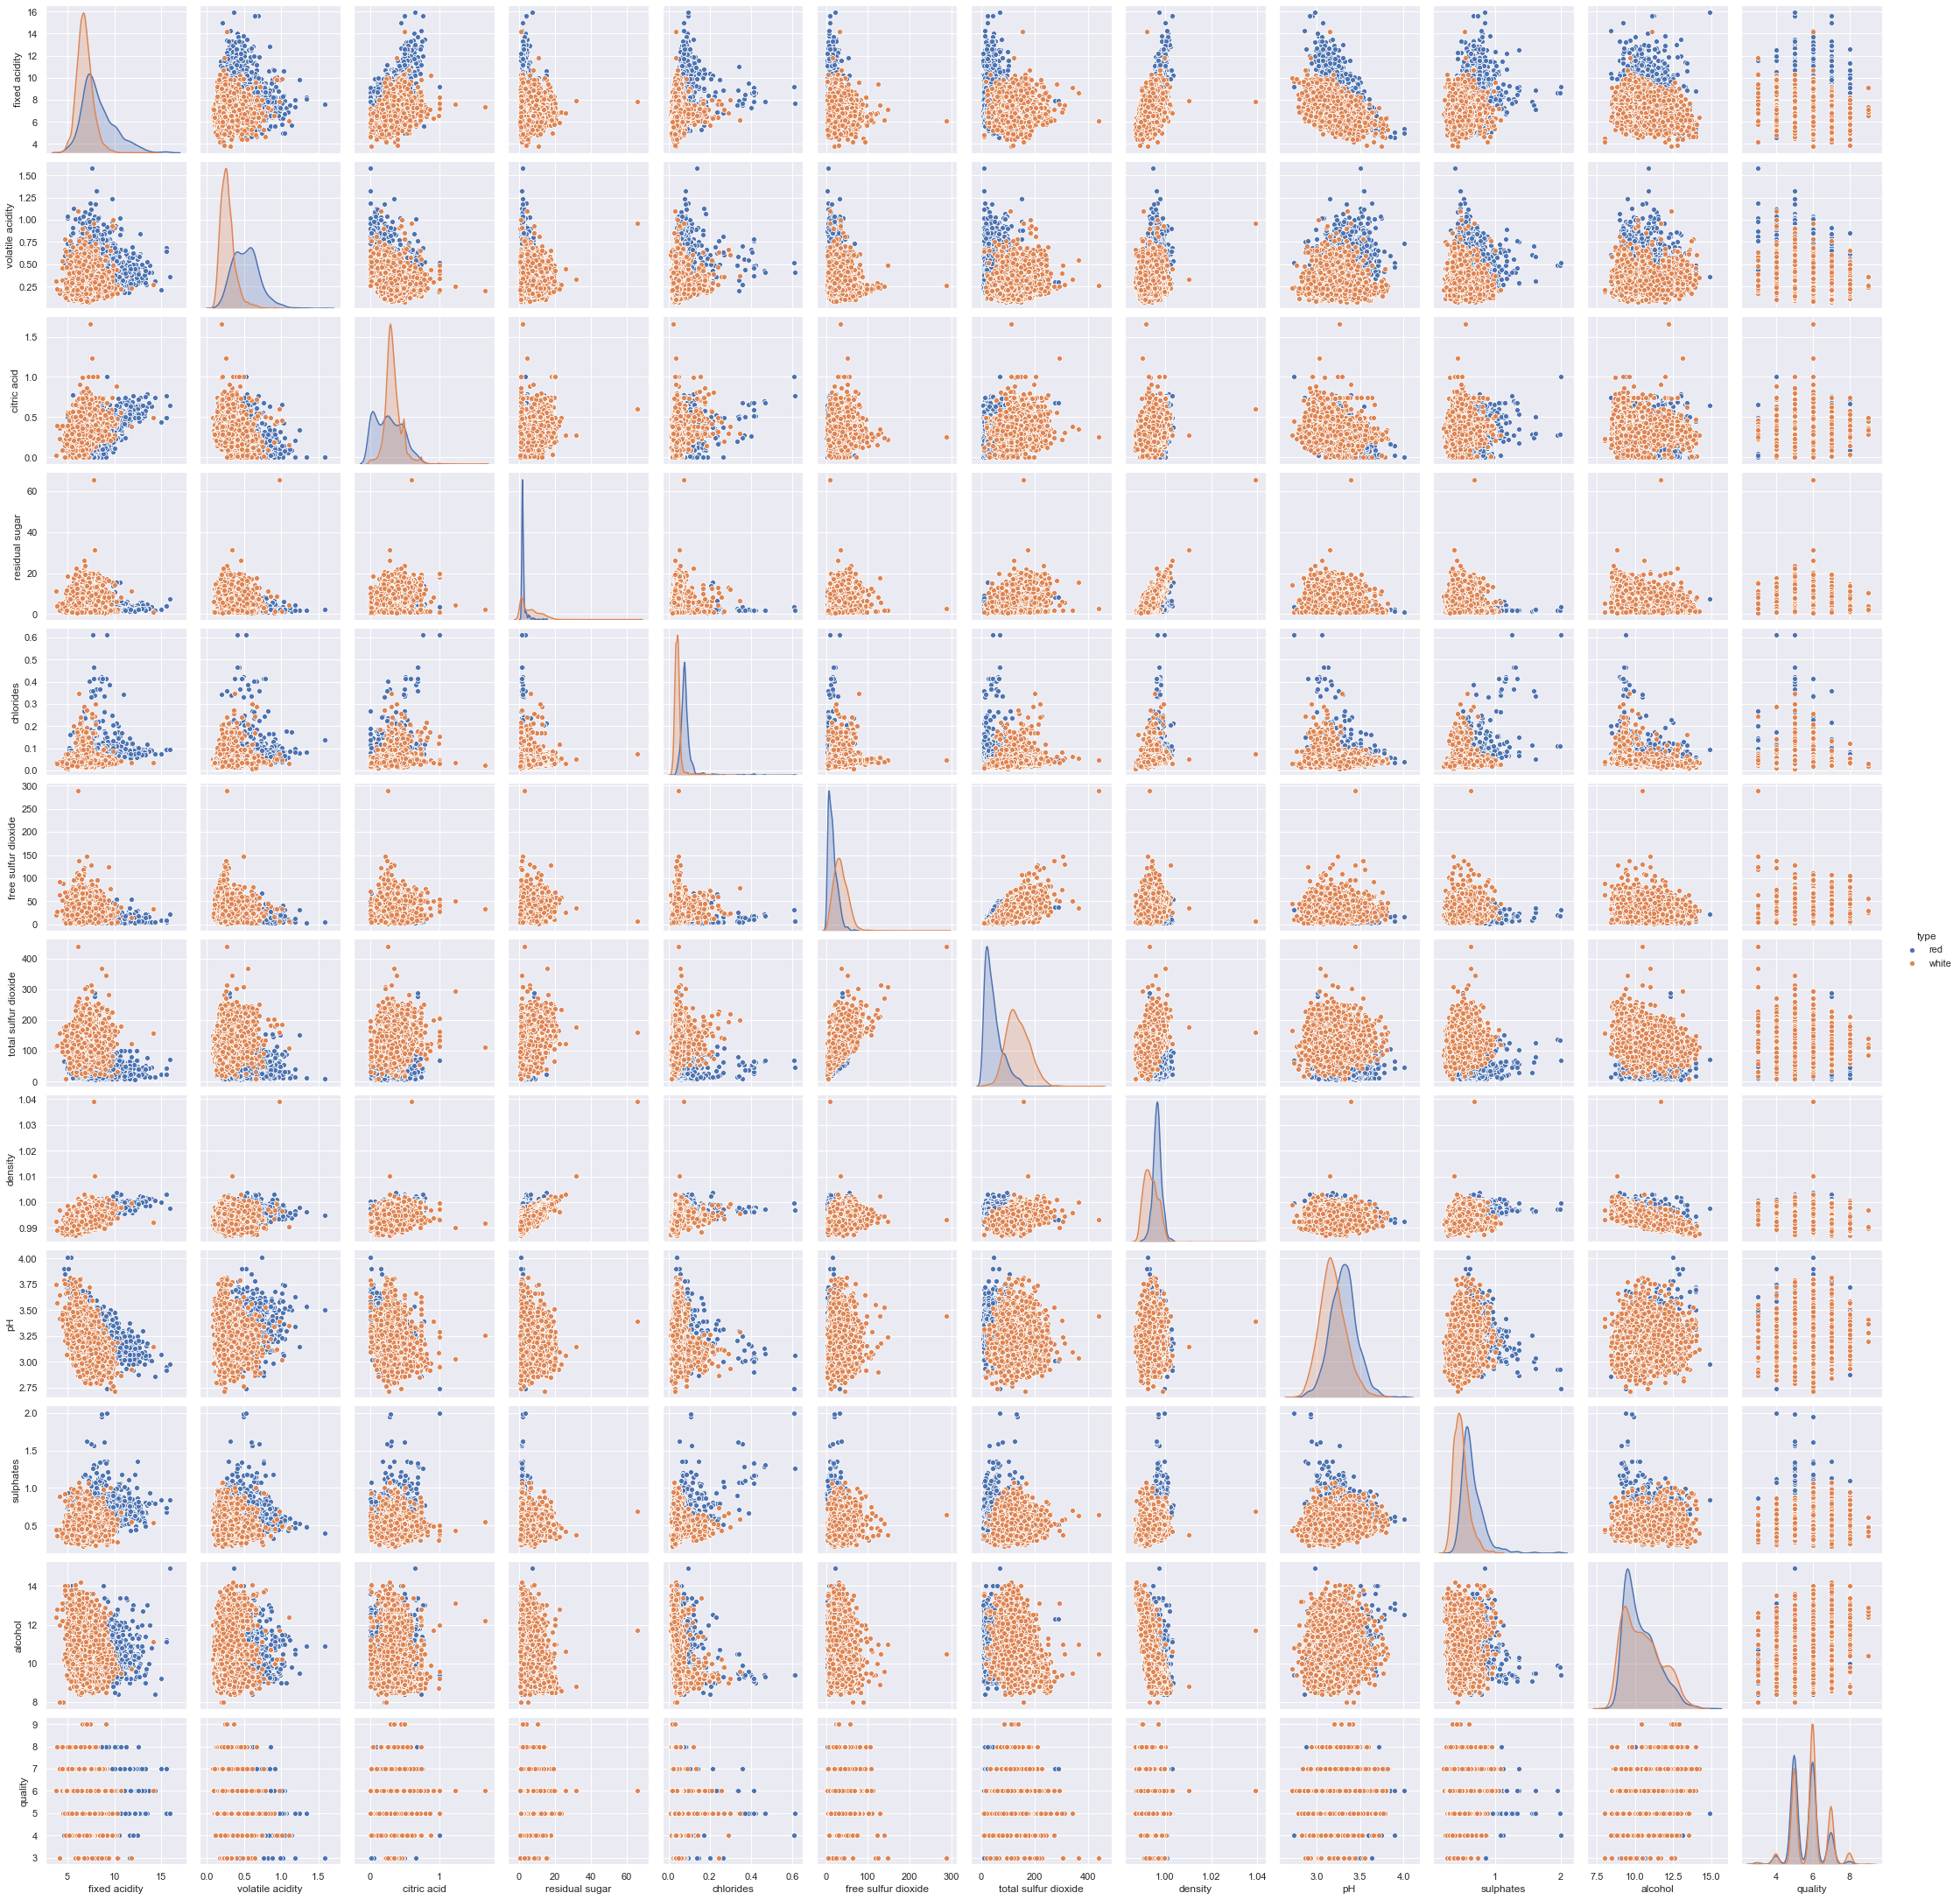

In [543]:
sns.pairplot(rw, hue='type', height=2.5); #the pairplot is colored based on the species

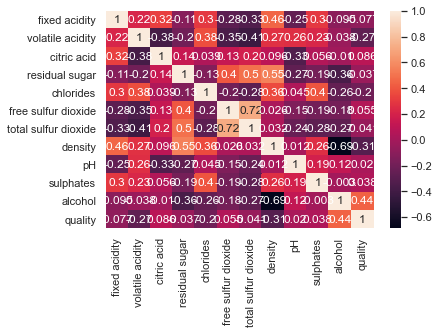

In [544]:
sns.heatmap(rw.corr(), annot=True)

백포도주와 적포도주의 알코올 농도가 다르다고 생각하십니까? 으로 설명하다.
t-검정을 이용한 데이터 시각화 및 통계 분석!

In [545]:
rw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [546]:
#Load the library for Statistical testing
from scipy.stats import ttest_ind
#df, ttest,pval = sm.stats.ttest_ind(data['newspaper'],data['radio'])
ttest,pval = ttest_ind(red['alcohol'],white['alcohol'])
print("ttest", ttest)
print("p-value",pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we fail to reject (accept) null hypothesis")

ttest -2.6585128987466375
p-value 0.007867873993342453
we reject null hypothesis


In [559]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


새로운열추가 / 새로운컬럼추가 

In [560]:
red['alcohol_x']=red['alcohol']

In [561]:
red['type_x']=red['type']

특정열뽑아내기  / 특정컬럼뽑기 / 뽑아내기 

In [562]:
r=red[['alcohol_x','type_x']]

In [563]:
w=white[['alcohol','type']]

두데이터합치기 / 합치기 / 열로합치기

In [564]:
wr=pd.concat([w,r],axis=1)

In [565]:
wr

,alcohol,type,alcohol_x,type_x
0,8.8,white,9.4,red
1,9.5,white,9.8,red
2,10.1,white,9.8,red
3,9.9,white,9.8,red
4,9.9,white,9.4,red
...,...,...,...,...
4893,11.2,white,NaN,NaN
4894,9.6,white,NaN,NaN
4895,9.4,white,NaN,NaN
4896,12.8,white,NaN,NaN


시각화

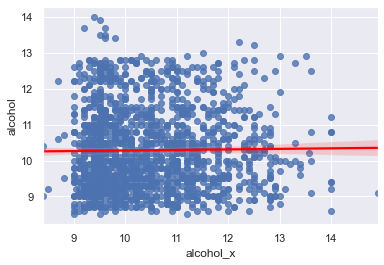

In [566]:
sns.regplot(x = wr[ "alcohol_x" ], y = wr[ "alcohol" ],line_kws={'color':"red"}) 

## null값채우기
## null값
## 다른데이터시각화
## 사이즈가 다르면 시각화를 못하므로 채워서 그리기 

In [572]:
wr.fillna(0)

,alcohol,type,alcohol_x,type_x
0,8.8,white,9.4,red
1,9.5,white,9.8,red
2,10.1,white,9.8,red
3,9.9,white,9.8,red
4,9.9,white,9.4,red
...,...,...,...,...
4893,11.2,white,0.0,0
4894,9.6,white,0.0,0
4895,9.4,white,0.0,0
4896,12.8,white,0.0,0


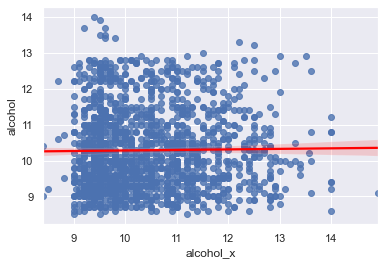

In [573]:
sns.regplot(x = wr[ "alcohol_x" ], y = w[ "alcohol" ],line_kws={'color':"red"}) 

## sep"_" 을 기준으로 데이터 값을 나눈다.

In [ ]:
mg.Name.str.split("_")

## 새로운 열을 생성하고, 그 새로운 열에 들어가는 값을 추가해준다.


In [ ]:
mg['first_name'] = mg.Name.str.split("_").str[0]

## 새로운 열을 만들고, 그 새로운 컬럼에 들어가는 값을 추가

In [ ]:
mg['last_name'] = mg.Name.str.split("_").str[1]

#### 빈도수
#### 가장많은것
#### 찾는방법
#### 데이터프레임으로 타입변환
#### argmax

In [ ]:
a=mg['last_name'].value_counts()
a

In [ ]:
a=pd.DataFrame(a)

In [ ]:
a.index[np.argmax(a['last_name'])]

### 요일
### 평일
### 주말
### 인덱스지정
### 하지만(.strftime('%A') - dayofweek할필요없음) 까먹지않기

In [ ]:
B

           - DataFrame형태
            steps
- day_of_week	
- Friday	86518.0
- Monday	69824.0
- Saturday	87748.0
- Sunday	85944.0
- Thursday	65702.0
- Tuesday	80546.0
- Wednesday	94326.0

In [ ]:
D={'Monday' : '평일', 'Tuesday': '평일', 'Wednesday': '평일' , 'Thursday' : '평일' , 'Friday': '평일', 'Satyrday' : '주말', 'Sunday' : '주말'}

In [ ]:
B.groupby(D).sum()

	   steps
주말	85944.0
평일	396916.0